In [1]:
import numpy as np

In [52]:
vecs = np.load("features.npy")

In [68]:
n_products = np.random.choice(range(len(vecs)), 500)

In [69]:
from scipy.cluster.hierarchy import dendrogram

In [86]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [87]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(vecs[n_products])


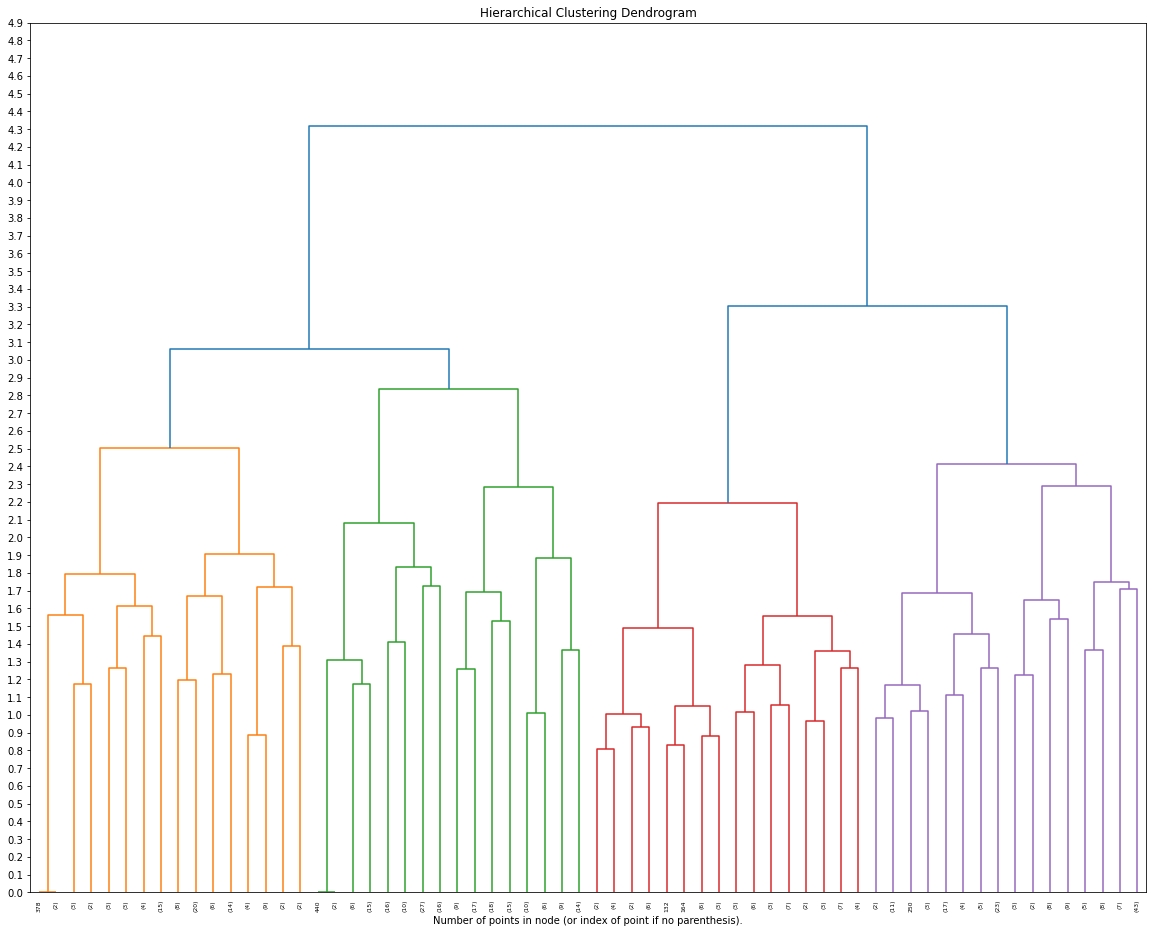

In [91]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,16))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.yticks(np.arange(0, 5, step=0.1))
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig("dendogram.png")
plt.show()